In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,f1_score
from sklearn.metrics import roc_auc_score, roc_curve,precision_score,recall_score,precision_recall_curve
from sklearn.decomposition import PCA

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [ ]:
df=pd.read_csv('data.csv')
df.head()

,id,diagnosis,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,21.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.shape

(569, 32)

In [ ]:
df.drop(columns=['id'],inplace=True)
df.shape

(569, 31)

In [ ]:
df.duplicated().sum()
df.isnull().sum()

,0
diagnosis,0
Radius_mean,0
Texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   Radius_mean              569 non-null    float64
 2   Texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

**Exploratory Data Analysis**

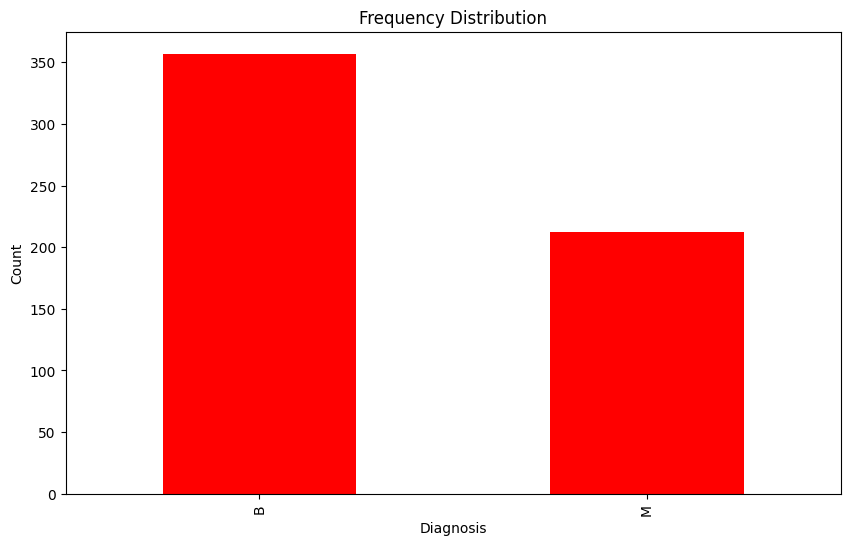

In [ ]:
counts = df['diagnosis'].value_counts()

plt.figure(figsize=(10, 6))
counts.plot(kind='bar', color='red')

plt.title('Frequency Distribution')
plt.xlabel('Diagnosis')
plt.ylabel('Count')

plt.show()

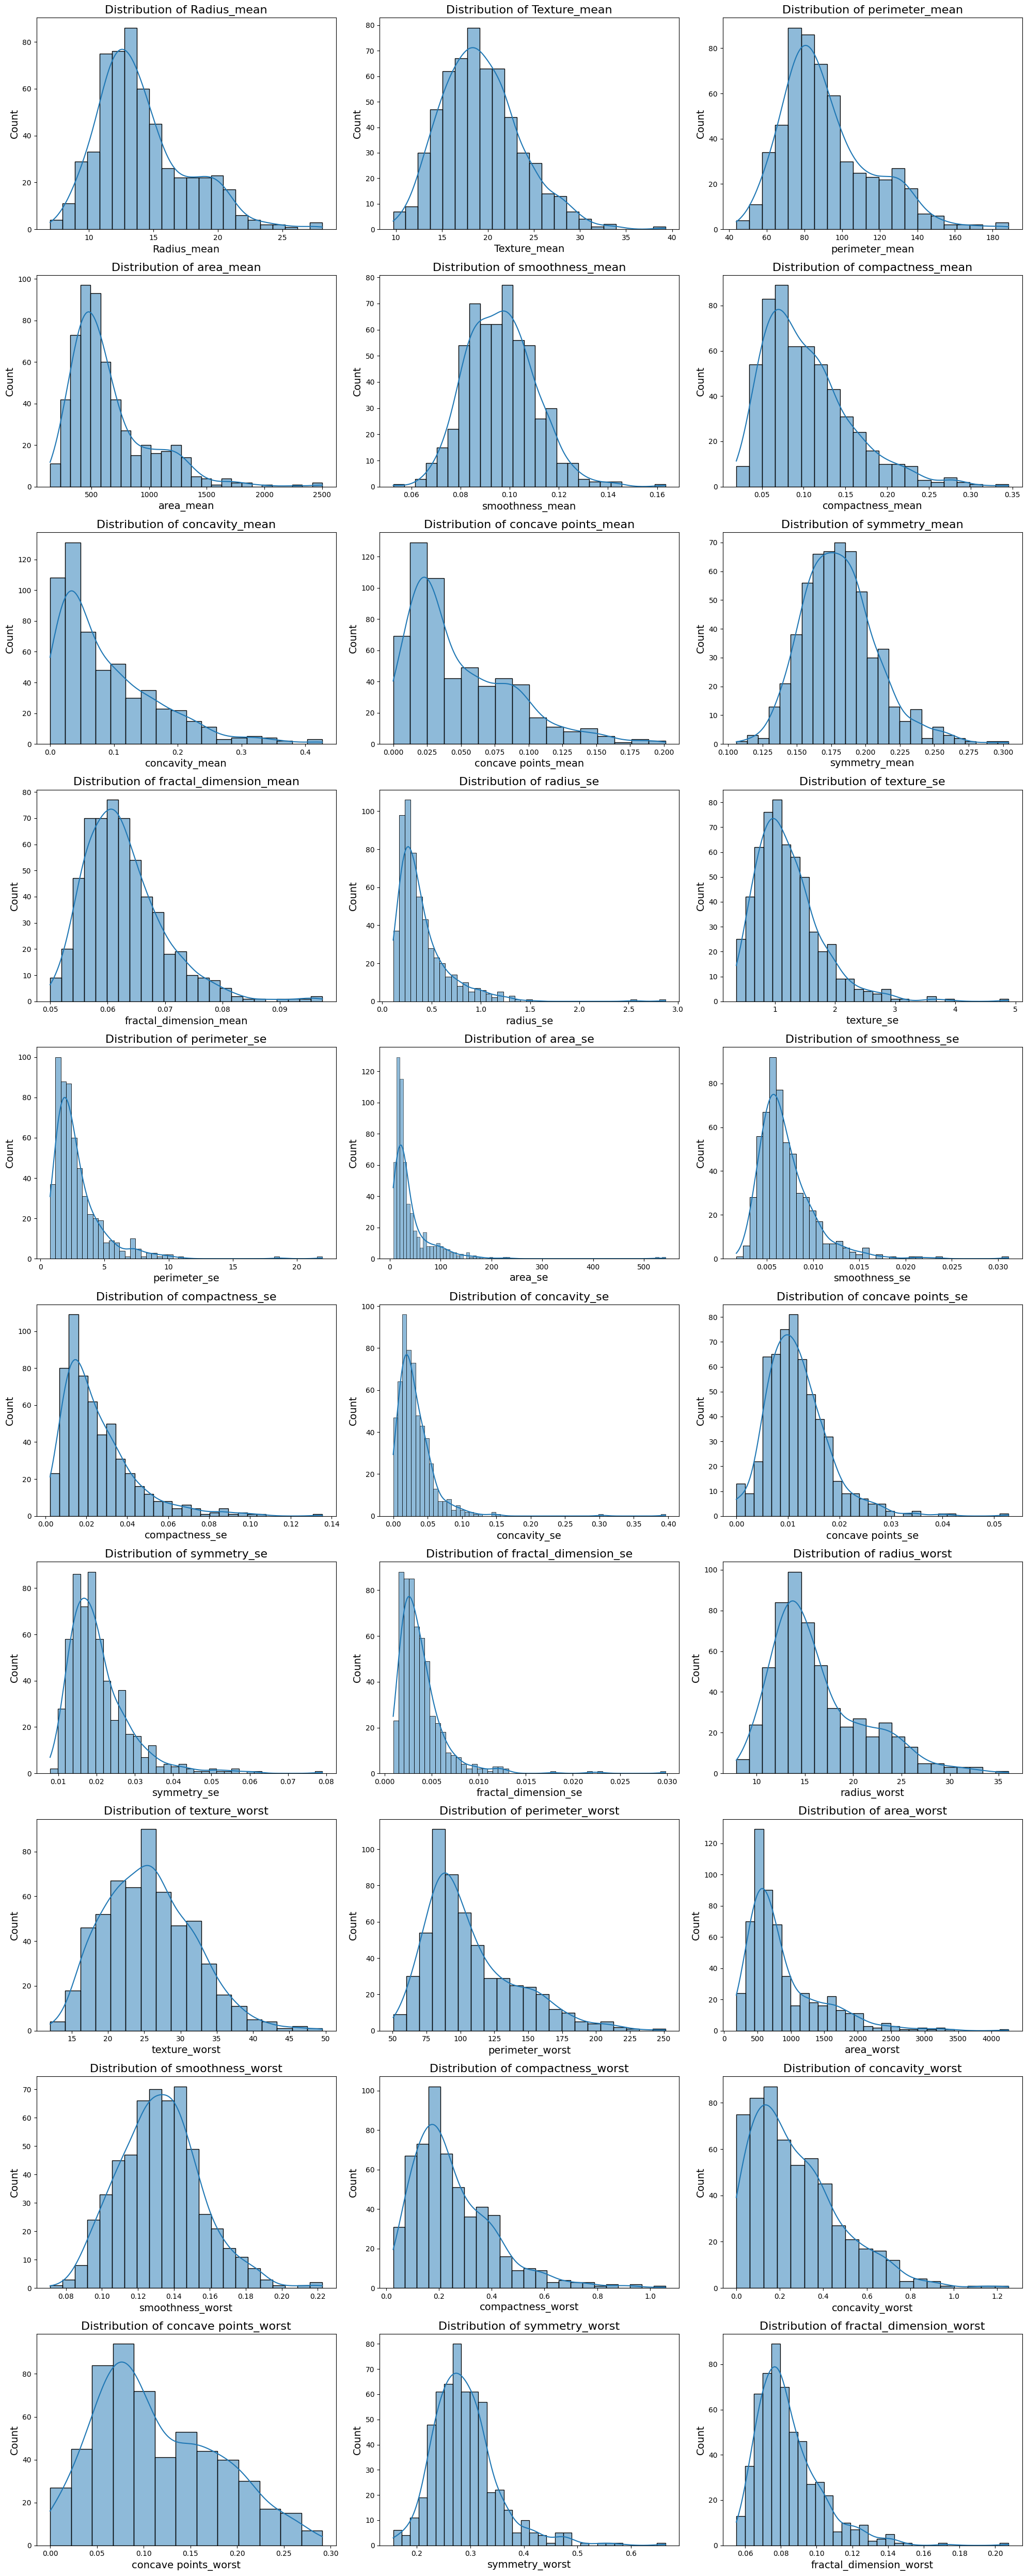

In [ ]:
cols=df.columns[1:]
fig, axes = plt.subplots(nrows = 10, ncols = 3, figsize = (20,50))

for i, ax in zip(cols, axes.flatten()):
    sns.histplot(data=df, ax=ax,x=i,kde=True)

    # Adding titles and labels
    ax.set_title(f'Distribution of {i}', fontsize=16)
    ax.set_xlabel(i, fontsize=14)
    ax.set_ylabel('Count', fontsize=14)

plt.tight_layout()
plt.show()

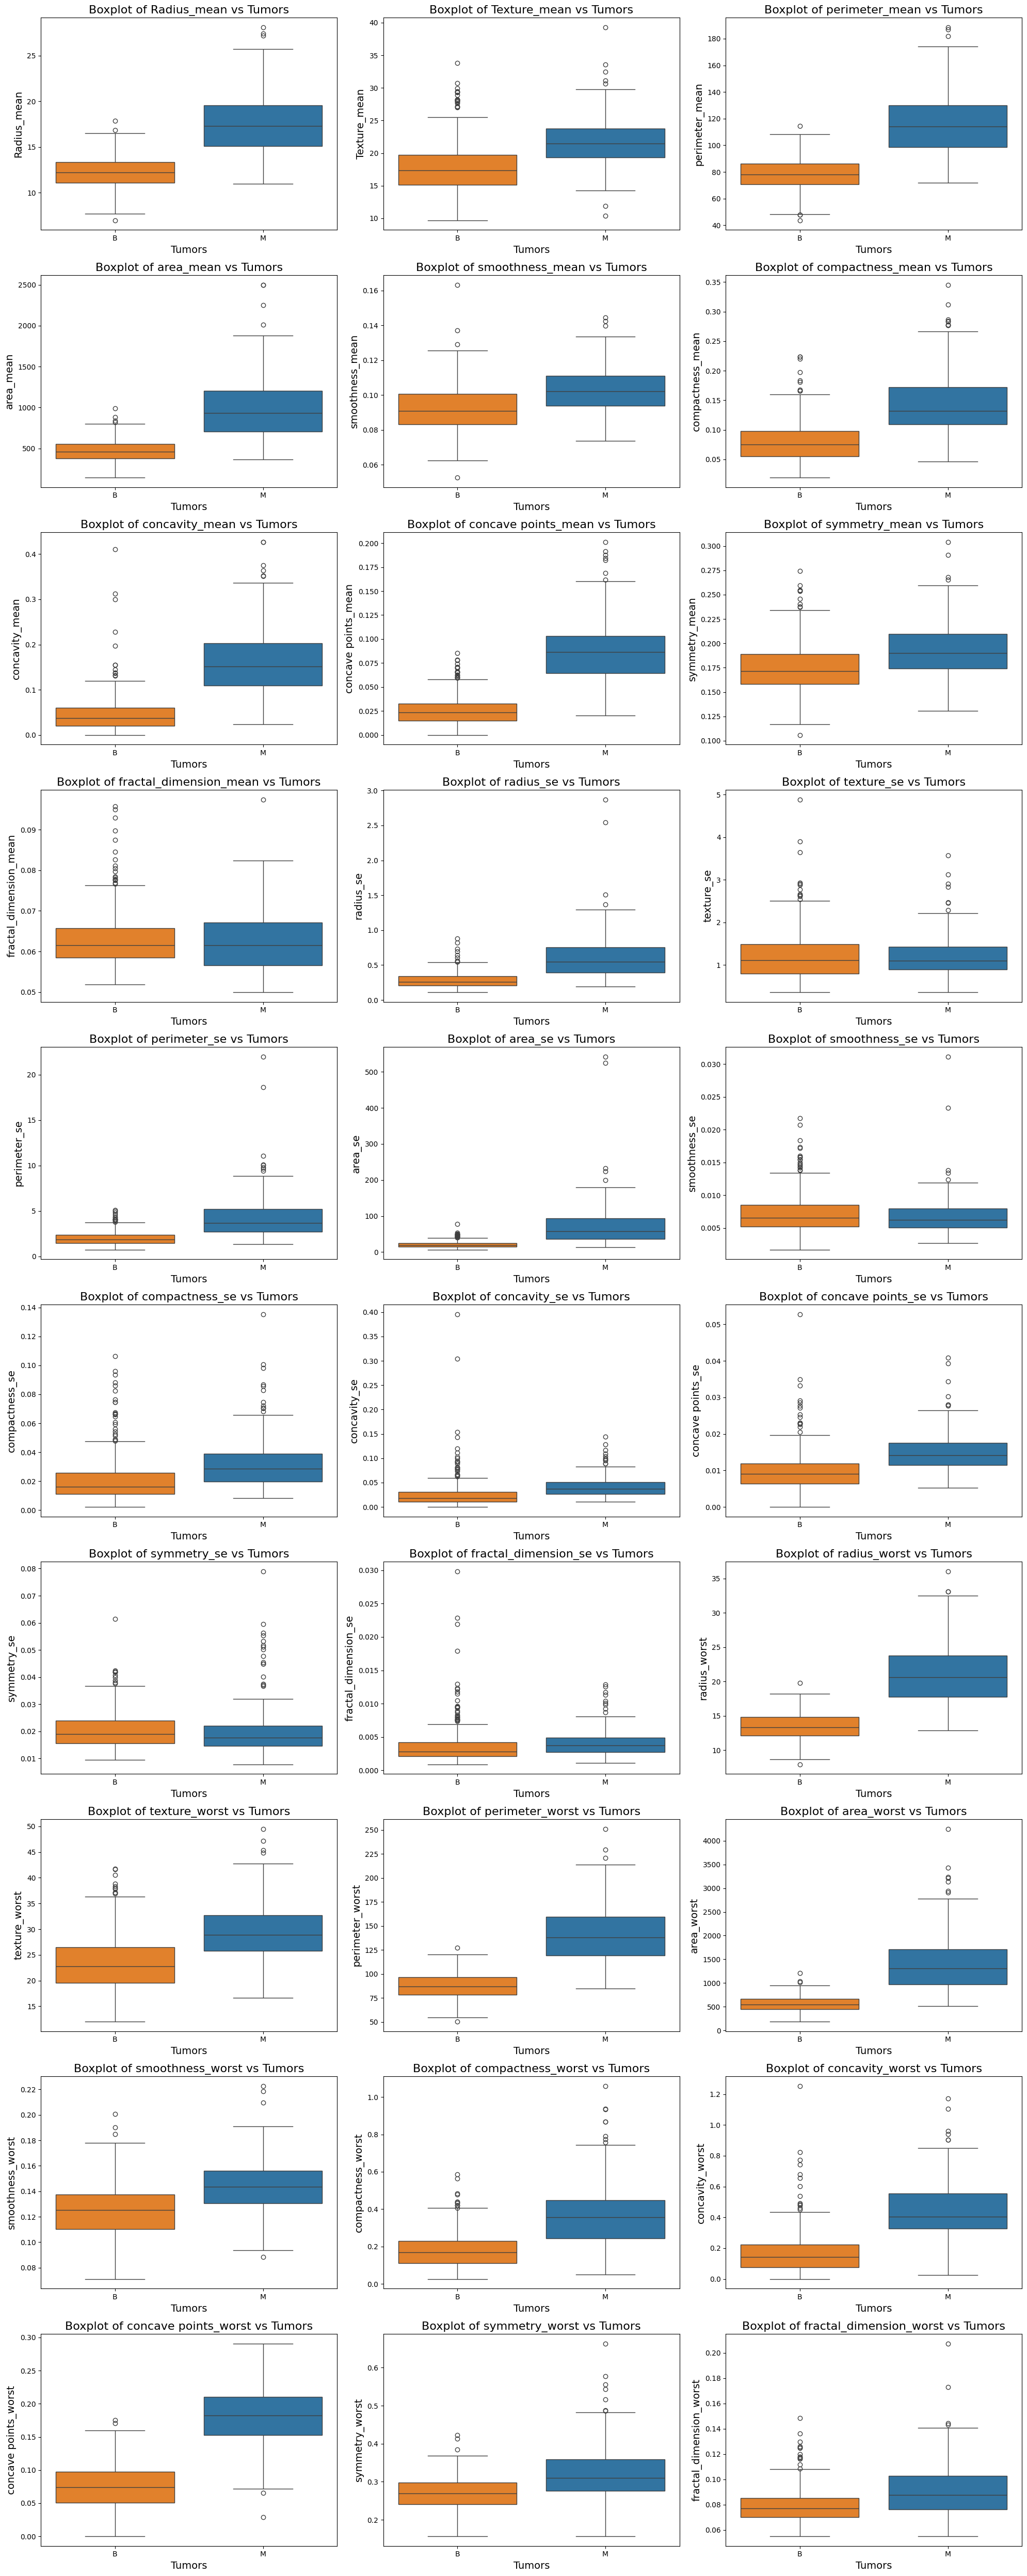

In [ ]:
cols=df.columns[1:]
fig, axes = plt.subplots(nrows = 10, ncols = 3, figsize = (20,50))

for i, ax in zip(cols, axes.flatten()):
    sns.boxplot(data=df, ax=ax,x='diagnosis',y=i,hue='diagnosis',order=['B','M'])

    # Adding titles and labels
    ax.set_title(f'Boxplot of {i} vs Tumors', fontsize=16)
    ax.set_xlabel('Tumors', fontsize=14)
    ax.set_ylabel(i, fontsize=14)

plt.tight_layout()
plt.show()

In [ ]:
X=df.drop(columns=['diagnosis'])
Y=df['diagnosis']

In [ ]:
sc=StandardScaler()
X=pd.DataFrame(sc.fit_transform(X),columns=sc.get_feature_names_out())
X.head()

,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.074594,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,0.575454,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.454469,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.252050,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.153243,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [ ]:
colmn=X.columns[1:]
outlier_data=pd.DataFrame()
for col in colmn:
  smth=X[(X[col]>3) | (X[col]<-3)]
  outlier_data=pd.concat([outlier_data,smth])
  outlier_data=outlier_data.drop_duplicates()
outlier_data

,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
219,1.534446,3.064964,1.484123,1.615766,-0.865392,0.164101,0.322671,0.450127,-1.400570,-1.370484,...,2.408538,3.213360,2.172543,2.806362,0.369598,0.988783,0.610780,0.729259,-0.303748,-0.458057
232,-0.825712,3.376734,-0.872369,-0.762473,-1.320851,-1.300090,-1.052512,-1.095861,0.121873,-0.640418,...,-0.809525,2.622237,-0.858464,-0.720187,-1.421536,-1.179499,-1.194624,-1.287960,0.016573,-0.602692
239,0.946536,4.649409,0.882746,0.755709,0.125231,0.482486,0.664167,1.010888,-0.009560,-0.444789,...,1.292363,3.125425,1.010895,0.927153,0.181104,0.758501,0.249047,1.400752,-0.077258,0.056202
259,0.398389,3.318568,0.483201,0.256000,0.707364,1.128731,1.083503,0.904617,1.020006,0.524852,...,0.459891,3.885905,0.567086,0.271451,2.451803,1.922000,1.430197,1.321574,0.988859,2.020138
82,3.150487,1.306021,3.275896,3.478653,0.707364,3.073153,3.077232,3.497170,0.063458,0.711976,...,2.843411,1.293432,3.110797,2.955784,1.092890,2.247704,1.801046,2.620403,-0.882913,1.172276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,0.219460,0.752279,0.417297,0.085638,0.221305,2.239288,2.316401,1.243034,0.837458,0.876418,...,0.016734,0.308227,0.540279,-0.084174,0.417818,2.892750,3.021056,2.023520,-0.056227,1.748601
31,-0.649623,-0.138826,-0.578271,-0.609460,1.034726,0.895628,0.414323,0.074825,1.786704,2.153679,...,0.114063,0.397791,0.361564,0.014269,1.373440,2.056226,2.031327,0.608969,3.009467,3.117372
35,0.742046,0.533574,0.746818,0.610375,-0.018523,0.554502,0.577537,0.290462,0.308072,-0.884246,...,0.774656,0.544350,0.781544,0.612486,1.049055,0.822115,1.289150,1.015519,3.174481,0.132121
323,1.764497,0.514961,1.809525,1.732374,1.468835,1.575986,2.105477,2.617595,2.765157,0.553204,...,1.870123,1.006827,1.901492,1.858847,1.176179,1.240059,1.257966,2.343279,4.298838,1.022654


In [ ]:
gg=outlier_data.index
df.drop(index=gg,axis=0,inplace=True)
df.shape

(495, 31)

In [ ]:
le=LabelEncoder()
Y=le.fit_transform(Y)

In [ ]:
X=df.drop(columns=['diagnosis'])
y=df['diagnosis']
X.shape

(495, 30)

In [ ]:
y.shape

(495,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
pca = PCA(n_components = 10)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
pca.explained_variance_ratio_.cumsum()

array([0.45300449, 0.62548643, 0.72194553, 0.78545998, 0.84345099,
       0.88683881, 0.91177823, 0.92874621, 0.94191474, 0.9539721 ])

#Logistic Regression

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
cm_lr = confusion_matrix(y_test, lr_pred)
print(cm_lr)
accuracy_score(y_test, lr_pred)

[[68  1]
 [ 2 28]]


0.9696969696969697

# KNN Model

In [ ]:
kn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
kn.fit(X_train, y_train)
kn_pred = kn.predict(X_test)
cm_kn = confusion_matrix(y_test, kn_pred)
print(cm_kn)
accuracy_score(y_test, kn_pred)

[[68  1]
 [ 2 28]]


0.9696969696969697

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
cm_nb = confusion_matrix(y_test, nb_pred)
print(cm_nb)
accuracy_score(y_test, nb_pred)

[[67  2]
 [ 5 25]]


0.9292929292929293

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
cm_rf = confusion_matrix(y_test, rf_pred)
print(cm_rf)
accuracy_score(y_test, rf_pred)

[[67  2]
 [ 4 26]]


0.9393939393939394

# GridSearchCV for Logistic Regression

In [ ]:
param_grid_lr = {
    'penalty': ['l1', 'l2'],               # Regularization type
    'C': [0.1, 1, 10],                     # Regularization strength
    'solver': ['liblinear', 'saga'],        # Solver type
}

# Apply GridSearchCV for Logistic Regression
grid_search_lr = GridSearchCV(estimator=lr, param_grid=param_grid_lr, cv=10)
grid_search_lr.fit(X_train, y_train)

# Get the best parameters and the best model
print(f"Best Parameters for Logistic Regression: {grid_search_lr.best_params_}")
best_log_reg = grid_search_lr.best_estimator_

# Evaluate on the test set
y_pred_lr = best_log_reg.predict(X_test)
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

Best Parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
Logistic Regression Accuracy: 0.9697


In [ ]:
lr = LogisticRegression(C = 0.1, penalty = 'l2', solver = 'saga')
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
cm_lr = confusion_matrix(y_test, lr_pred)
print(cm_lr)
accuracy_score(y_test, lr_pred)

[[69  0]
 [ 3 27]]


0.9696969696969697

# GridSearchCV for KNN

In [ ]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],            # Number of neighbors
    'weights': ['uniform', 'distance'],     # Weight function used in prediction
    'metric': ['euclidean', 'manhattan']    # Distance metric
}

# Apply GridSearchCV for KNN
grid_search_knn = GridSearchCV(estimator=kn, param_grid=param_grid_knn, cv=10)
grid_search_knn.fit(X_train, y_train)

# Get the best parameters and the best model
print(f"Best Parameters for KNN: {grid_search_knn.best_params_}")
best_knn = grid_search_knn.best_estimator_

# Evaluate on the test set
y_pred_knn = best_knn.predict(X_test)
print(f"KNN Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")

Best Parameters for KNN: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
KNN Accuracy: 0.9798


In [ ]:
kn = KNeighborsClassifier(metric = 'euclidean', n_neighbors = 9, weights = 'distance')
kn.fit(X_train, y_train)
kn_pred = kn.predict(X_test)
cm_kn = confusion_matrix(y_test, kn_pred)
print(cm_kn)
accuracy_score(y_test, kn_pred)

[[69  0]
 [ 2 28]]


0.9797979797979798